M # ALY6140 Capstone Project -- Passenger Satisfaction Analysis

## Introduction
Passenger satisfaction data was collected in a survey of airline customers. The objective is to conduct exploratory data analysis to study the variables defined in the dataset and apply machine learning algoritms so as to come up with a suitable model that helps to predict if the airline customer will be satisfied or not.
If airlines can predict what factors make the customer happy, they can help increase customer loyalty and expand customer intake.

## Dataset
The original source of the dataset is unknown but retrieved from kaggle website. It contains information collected from multiple major U.S Airlines, pertaining to the passenger's experience with the airline they used for thier travel. Our objective is to use and study the data collected from previous customers to predict if a future customer will be satisfied with thier airline experience. 

### Team Members
Xinyan He,Hao Liu,Bhumika Mohan,Bo Wang


### Acknowledgements & Source

D.John(2018). Passenger Satisfaction dataset. Retrieved from https://www.kaggle.com/johndddddd/customer-satisfaction#satisfaction.xlsx 



# 1. Load Data

Download the dataset from the kaggle website link mentioned above and load it into the program.

* load data and take a look.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
df = pd.read_excel('satisfaction.xlsx')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# 2. Data cleaning
* Dealing with missing value and outliers

In [2]:
df = df.drop(["id"], axis = 1) # id is useless in predicting satisfiction
print(df.shape)
print(df.columns)
df.describe() #according to row of "count", the last column has missing values 

(129880, 23)
Index(['satisfaction_v2', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [3]:
#check missing values
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = False)

,index,column_name,missing_count,filling_factor
0,22,Arrival Delay in Minutes,393,99.697413
1,20,Online boarding,0,100.000000
2,19,Cleanliness,0,100.000000
3,18,Checkin service,0,100.000000
4,17,Baggage handling,0,100.000000
5,16,Leg room service,0,100.000000
6,15,On-board service,0,100.000000
7,14,Ease of Online booking,0,100.000000
8,13,Online support,0,100.000000
9,12,Inflight entertainment,0,100.000000


* Fortunately, the missing values are only about 0.3%. Considering we have nearly 1.3 million instances, we can just delete those incomplete rows.
* Or, we can fill these cells with other values. To do this, I need first check the distribution of column with missing data.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


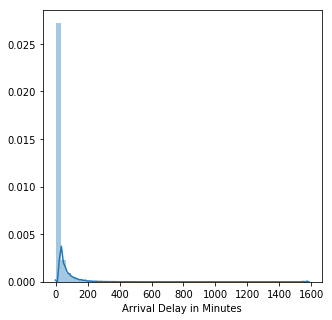

In [4]:
# check incompleted column
plt.figure(figsize=(5,5))
sns.distplot(df['Arrival Delay in Minutes'].dropna(axis=0, how='any', inplace=False))

* Apparently, it is an extremely biased distribution. In this case, median can be more representative than mean. So we can just fill column median to thoses cells.

In [5]:
# replace Na with median
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].replace(np.NaN,df['Arrival Delay in Minutes'].median() )

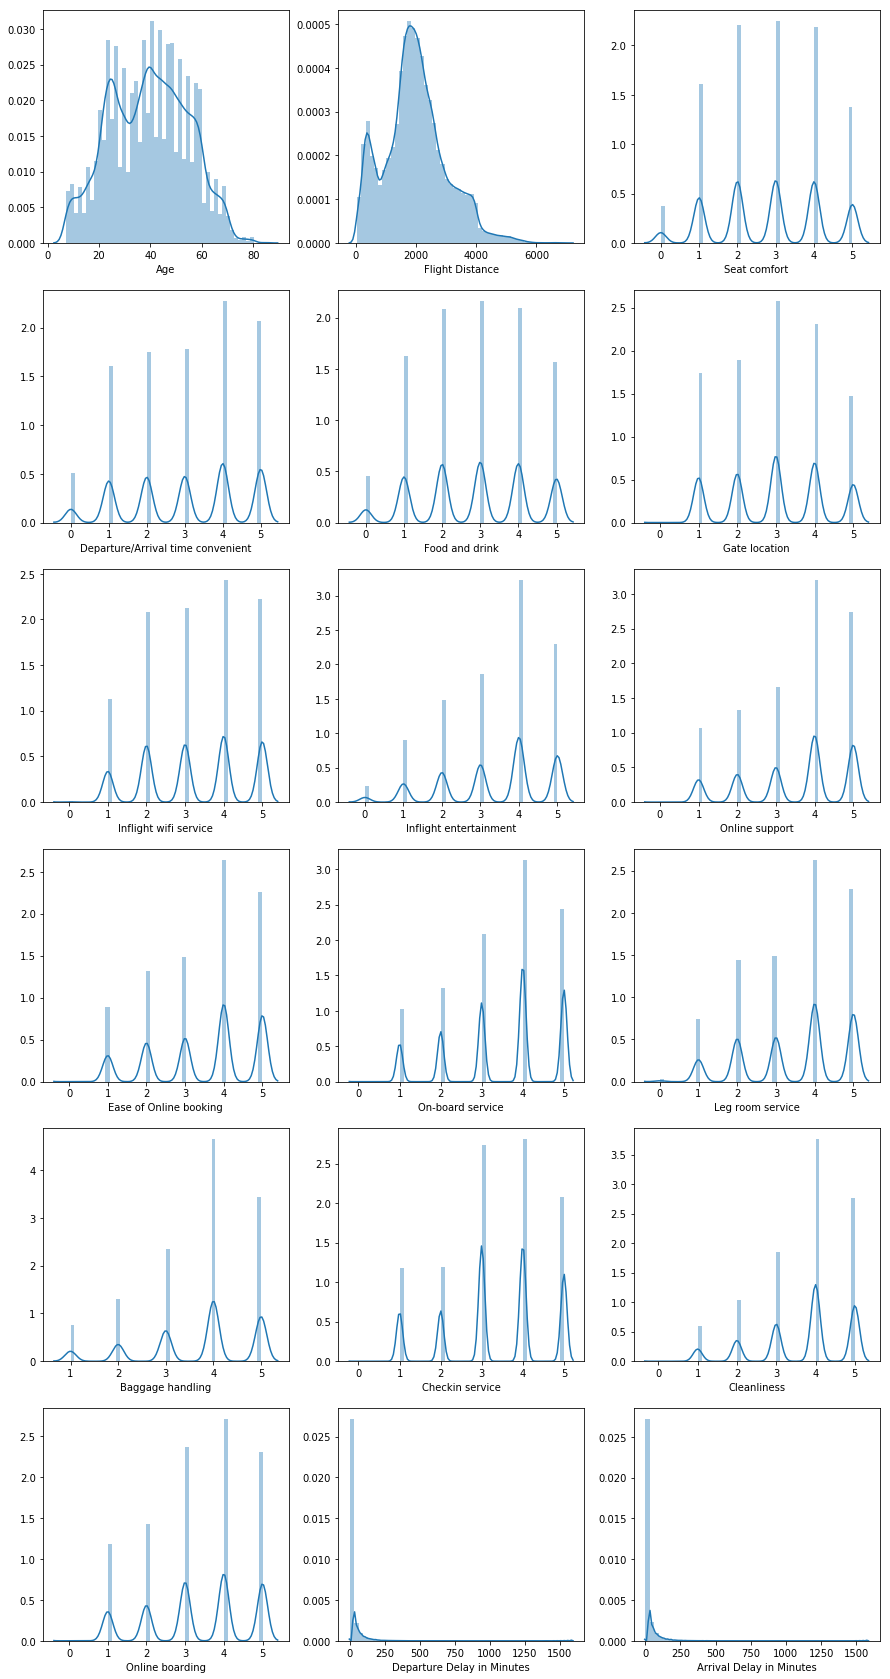

In [6]:
# check outliers
plt.figure(figsize=(15,30))
for i, col  in enumerate(df.describe().columns):
    plt.subplot(6,3,i+1)
    sns.distplot(df[col])

* No outlier observed.
* From the distribution plots, we can observe obvious trends about age and flight distance. The age of pessengers in this dataset is mostly ranged from 20 to 60.   
* Most passengers travel for about 2000 miles of distance in a flight. Also, many passengers had a trip with very short distance.

# 3. Exploratory visulization

## Important properties of the data

Text(0.5, 1.0, 'Passenger Satisfaction')

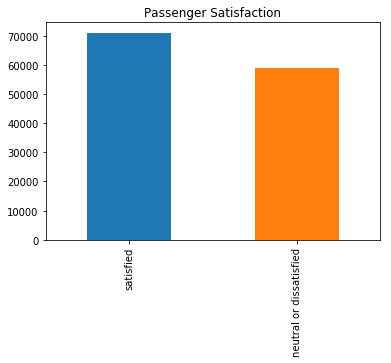

In [7]:
pd.value_counts(df['satisfaction_v2']).plot(kind="bar")
plt.title('Passenger Satisfaction')

The most important property of this dataset is passenger satisfaction level. There are two kinds of values in the column of satisfaction.
From the bar chart, we can see the number of satisfied is much larger than the number of neutral of dissatisfied.

In [8]:
B = sum(df.Class == 'Business')
E = sum(df.Class == 'Eco')
EP = sum(df.Class == 'Eco Plus')

Text(0.5, 1.0, 'Class split proportions')

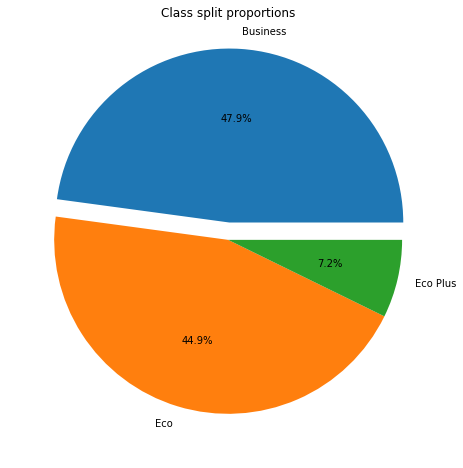

In [9]:
plt.figure(figsize=(8,8))
plt.pie(x=[B, E, EP],explode=[0.1, 0, 0],autopct='%0.1f%%',labels=['Business','Eco','Eco Plus'])
plt.title('Class split proportions')

There are three class of seating in the dataset. From the pie chart, we can see almost a half of the passengers chose business class, about 45% of passengers chose economy class, and a small persentage of passengers chose economy plus in the plane. 

Text(0.5, 1.0, 'Type of Travel')

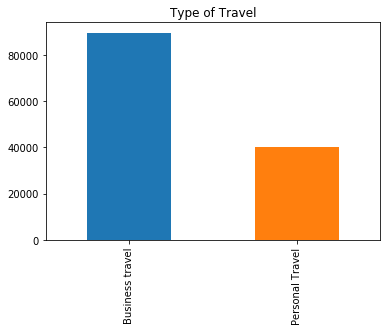

In [10]:
pd.value_counts(df['Type of Travel']).plot(kind="bar")
plt.title('Type of Travel')

There are two tpyes of travel in the dataset, from the height of the bars we can see the passengers who travel on business purpose are twice as many as passengers with personal purpose. 

Text(0.5, 1.0, 'Boxplot of Flight Distance')

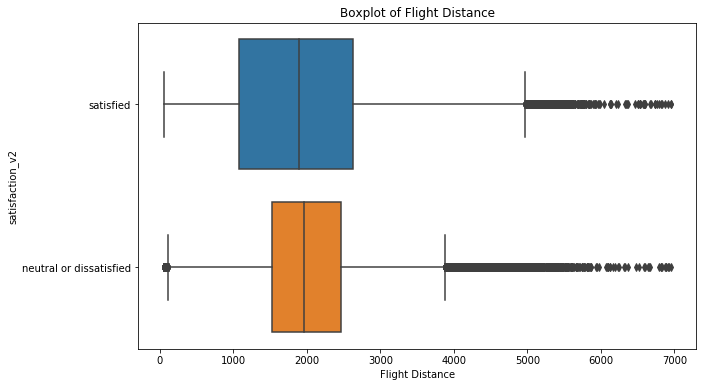

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot( x='Flight Distance',y='satisfaction_v2',data = df)
plt.title('Boxplot of Flight Distance')

This is a boxplot of flight distance vs satisfaction. Compare the interquartile range (IQR) and median of the two boxes, we can see that passengers who are satisfied usually have shorter flight distance. It means that when passengers have longer flight distance, they are probably less satisfied.

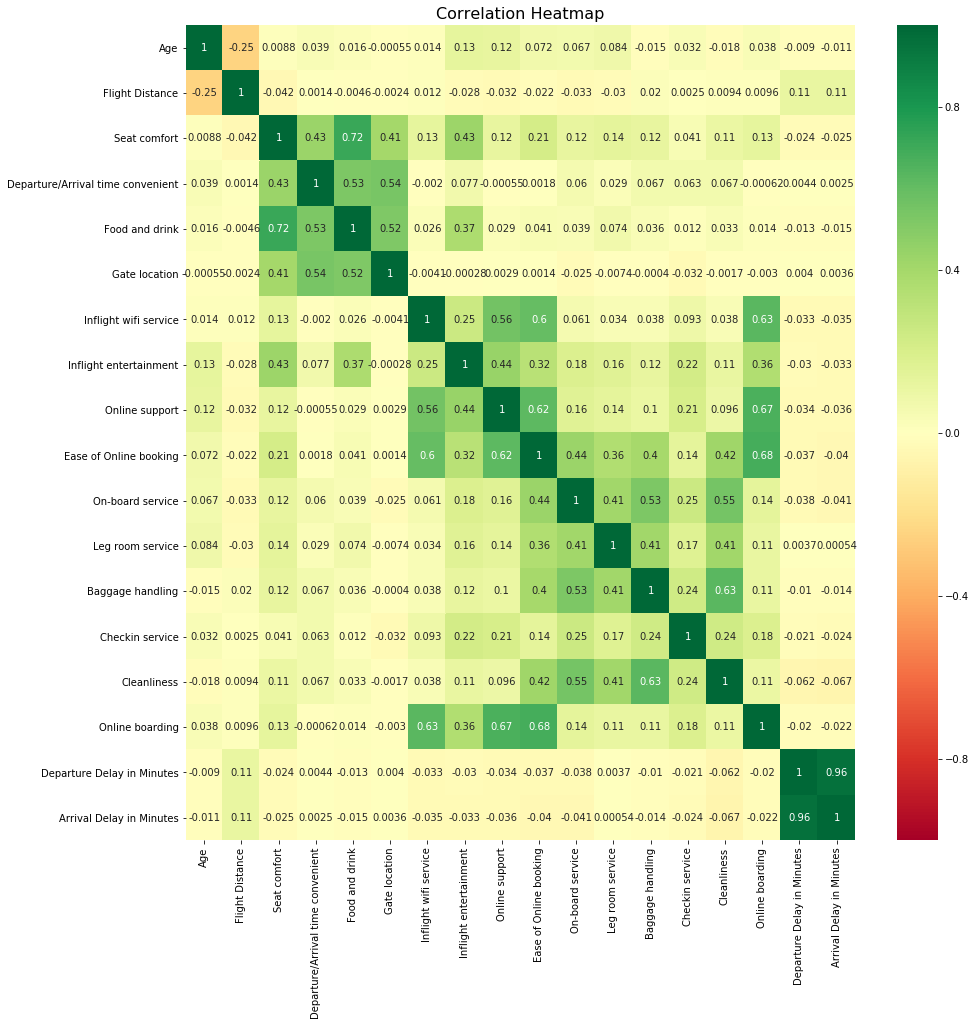

In [12]:
#corelation
plt.figure(figsize=(15,15))
corr = df[df.describe().columns].corr()
corr.index = df.describe().columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<Figure size 1080x1080 with 0 Axes>

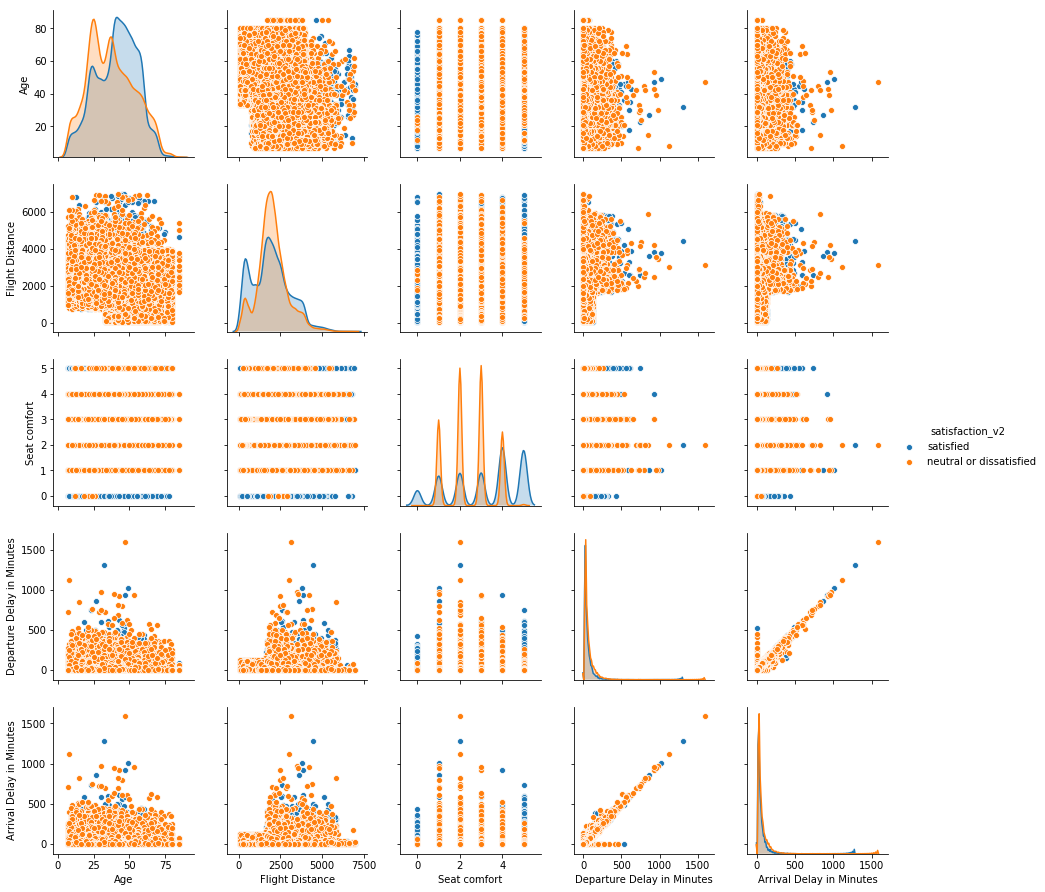

In [13]:
plt.figure(figsize=(15,15))
sns.pairplot(df, vars= ['Age','Flight Distance','Seat comfort','Departure Delay in Minutes','Arrival Delay in Minutes'], hue='satisfaction_v2');

<Figure size 2880x1440 with 0 Axes>

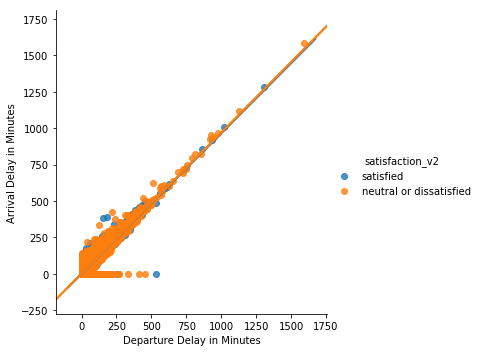

In [14]:
plt.figure(figsize=(40,20))
sns.lmplot(x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="satisfaction_v2", data=df);

* This plot shows the correlation between departure delay time and arribal delay time. From the slope of the line, we can see a very strong correlation between the two variables, and the correlation is close to 1.  
* It means that when the time of departure delay increase, the time of arrival delay will increase, too. It makes sense because in real case, delay in departure always cause delay in arrival. 

# 4. Prepare for prediction. 
* Because there are several columns storing categorical values, we need make some effort to encode them to numerical values before inputing to models.

In [15]:
# search category columns
cate_cols = []
for i in df.columns:
    if i not in df.describe().columns:
        cate_cols.append(i)
# prepare for making dict: saerch categories in each columns

for i in cate_cols:
    print("Categories in column of {} are: {}\n".format(i, df[i].unique()))

Categories in column of satisfaction_v2 are: ['satisfied' 'neutral or dissatisfied']

Categories in column of Gender are: ['Female' 'Male']

Categories in column of Customer Type are: ['Loyal Customer' 'disloyal Customer']

Categories in column of Type of Travel are: ['Personal Travel' 'Business travel']

Categories in column of Class are: ['Eco' 'Business' 'Eco Plus']



In [16]:
cate_dict= {
    "satisfaction_v2":{"neutral or dissatisfied":0,"satisfied":1},
    "Gender":{"Female":0,"Male":1},
    "Customer Type":{"Loyal Customer":0,"disloyal Customer":1},
    "Type of Travel":{"Business travel":0,"Personal Travel":1},
    "Class":{"Business":0,"Eco":1,"Eco Plus":2}
}
df = df.replace(cate_dict)

# 5. Prediction
## Splitting datasets

In [17]:
from sklearn.model_selection import train_test_split
X = df[df.columns[1:]]
y = df[df.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (97410, 22)
y_train shape: (97410,)
X_test shape: (32470, 22)
y_test shape: (32470,)


## Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree=DecisionTreeClassifier()  

# Train the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
from sklearn.metrics import roc_auc_score
y_pred = dtree.predict(X_test) 
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred)))

Test set score: 0.939
AUC score: 0.938


* A nearly perfect result! Quite impressive. It is probably because the raw data is clean and neat already.

### Plot decision tree
* ATTENTION: This part require installing package of "graphviz".

In [20]:
from sklearn.tree import export_graphviz
import graphviz  
export_graphviz(dtree, out_file='satisfaction.gv', filled=True, rounded=True, special_characters=True)
graphviz.render(filepath='satisfaction.gv', engine='dot', format='png' )

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
from IPython.display import Image
Image('satisfaction.gv.png')

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred)))

* Not as good as decision tree, but still a good grade generally.

## KNN
* Change K value for multiple times for a best output.

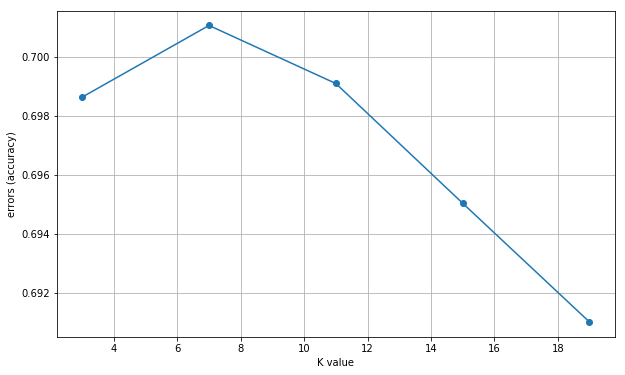

In [21]:
from sklearn.neighbors import KNeighborsClassifier
iters = list(range(3,23,4))
errors = []
for i in iters:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    errors.append(np.mean(y_pred==y_test))
plt.figure(figsize=(10,6))
plt.plot(iters, errors, 'o-')
plt.xlabel('K value')
plt.ylabel('errors (accuracy)')
plt.grid()

* The accuracy is highest at about K = 3

In [22]:
knn=KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred)))

Test set score: 0.701
AUC score: 0.696


* Not so good as previous ones.

## Logistic Regression


In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test set score: 0.833


* 2nd highest score

In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11914,  2706],
       [ 2720, 15130]])

Text(0.5, 257.44, 'Predicted label')

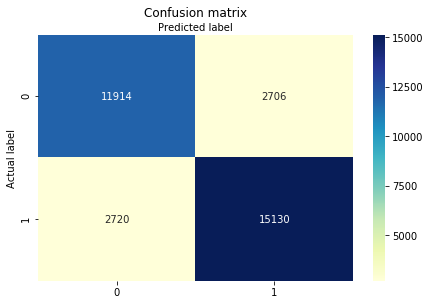

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8328919002155836
Precision: 0.848284368692532
Recall: 0.8476190476190476


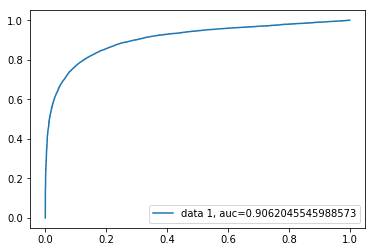

In [27]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 6. Model optimazation
* Although most model have already give satisfied results, model optimazation is always a necessary part.
## Ensemble model: Randomforest
    * Randomforest improves model performance by summarizing results from multiple trees.

In [28]:
from sklearn.ensemble import RandomForestClassifier 
RF= RandomForestClassifier(n_estimators=125,random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test) 
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred)))

Test set score: 0.959
AUC score: 0.959


* The score improves. Considering the previous result is already good enough, it is a big improvement.

    * Here, we can also check which column in the data contributes the most during prediction.

                        importance
Inflight entertainment    0.194303
Seat comfort              0.133870
Ease of Online booking    0.070664
Online support            0.064927
Customer Type             0.047899
Leg room service          0.043341
On-board service          0.041234
Food and drink            0.039687
Flight Distance           0.036132
Class                     0.035581


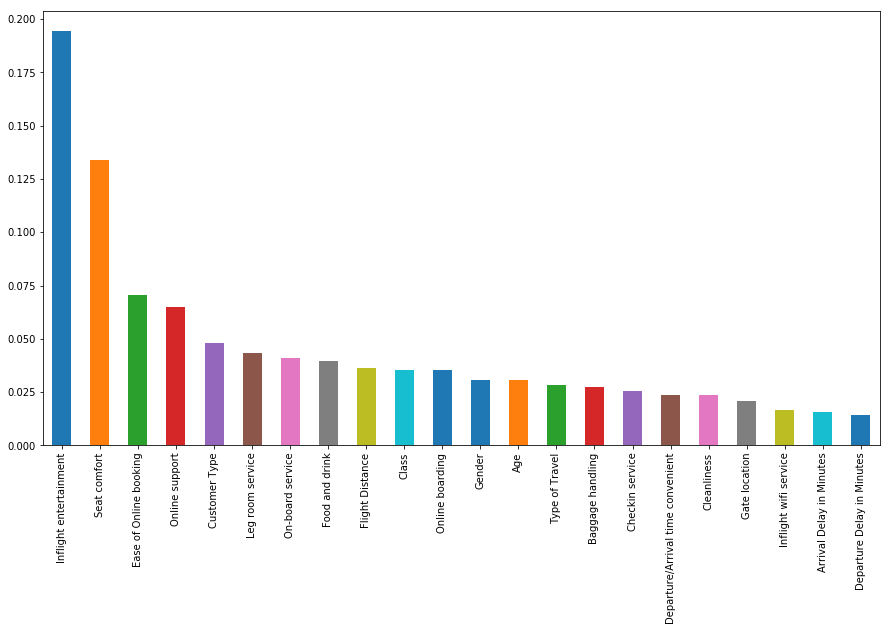

In [29]:
plt.figure(figsize=(15,8))
feat_importances = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(22).plot(kind='bar')
print(pd.DataFrame(feat_importances.nlargest(10), columns = ["importance"]))

* RandomForest can also be optimized by tuning the number of generated decision trees.

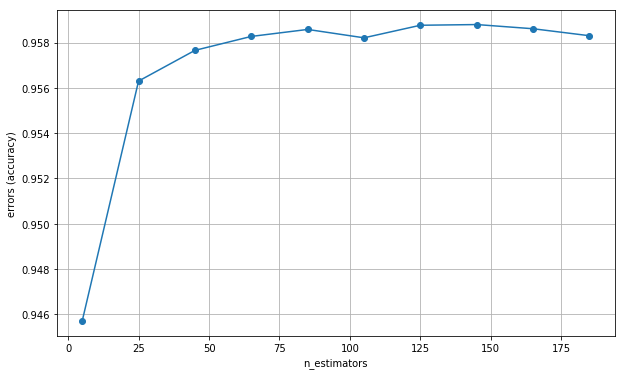

In [30]:
iters = list(range(5,201,20))
errors = []
for i in iters:
    model = RandomForestClassifier(n_estimators=i,random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    errors.append(np.mean(y_pred==y_test))
plt.figure(figsize=(10,6))
plt.plot(iters, errors, 'o-')
plt.xlabel('n_estimators')
plt.ylabel('errors (accuracy)')
plt.grid()

## Normalization
* KNN method makes prediction by claculating distance. Different scales of columns will seriouly influence its performance. 
    * Normalization can solve this problem.
    * Here I employ [0,1] normalization.

In [33]:
#normalization
X_norm = pd.DataFrame()
for i in X.columns:
    X_norm[i] = (X[i] - np.min(X[i])) / (np.max(X[i]) - np.min(X[i]))

In [32]:
# creating new training data
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, random_state=0)
print("X_train shape: {}".format(X_norm_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_norm_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (97410, 22)
y_train shape: (97410,)
X_test shape: (32470, 22)
y_test shape: (32470,)


In [34]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_norm_train, y_train)
y_pred = knn.predict(X_norm_test)
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred)))

Test set score: 0.925
AUC score: 0.926


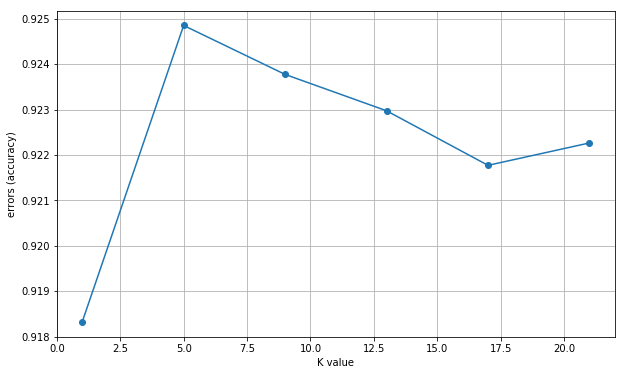

In [35]:
iters = list(range(1,23,4))
errors = []
for i in iters:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_norm_train, y_train)
    y_pred = model.predict(X_norm_test) 
    errors.append(np.mean(y_pred==y_test))
plt.figure(figsize=(10,6))
plt.plot(iters, errors, 'o-')
plt.xlabel('K value')
plt.ylabel('errors (accuracy)')
plt.grid()